In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image

In [ ]:
import os
from google.colab import drive

drive.mount('drive')

!mkdir -p drive -v

cwd = os.getcwd()

Mounted at drive


In [ ]:
# Importing low resolution images

monchemin = 'drive/My Drive/LR/'

dir_path=os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
print (dirs)

os.chdir(dir_path)

['82.png', '76.png', '15.png', '49.png', '28.png', '27.png', '17.png', '2.png', '67.png', '62.png', '4.png', '44.png', '93.png', '71.png', '80.png', '0.png', '23.png', '52.png', '22.png', '57.png', '87.png', '29.png', '53.png', '63.png', '94.png', '40.png', '95.png', '58.png', '89.png', '86.png', '12.png', '1.png', '6.png', '19.png', '39.png', '77.png', '92.png', '14.png', '3.png', '68.png', '61.png', '11.png', '72.png', '41.png', '43.png', '20.png', '70.png', '83.png', '31.png', '99.png', '84.png', '81.png', '50.png', '46.png', '9.png', '64.png', '7.png', '21.png', '51.png', '88.png', '32.png', '8.png', '66.png', '42.png', '85.png', '97.png', '5.png', '10.png', '26.png', '35.png', '60.png', '24.png', '18.png', '36.png', '56.png', '25.png', '13.png', '47.png', '55.png', '30.png', '98.png', '16.png', '75.png', '65.png', '37.png', '73.png', '74.png', '45.png', '48.png', '78.png', '91.png', '59.png', '90.png', '96.png', '54.png', '34.png', '38.png', '33.png', '69.png', '79.png']


In [ ]:
# Putting low-resolution images into a list

lr = []
for i in range(100):
  py = str(i)+'.png'
  ind = dirs.index(py)
  im = Image.open(dirs[ind])
  image_array = np.array(im)
  lr.append(image_array)

In [ ]:
# Importing high resolution images

monchemin = 'drive/My Drive/HR/'

dir_path=os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
print (dirs)

os.chdir(dir_path)

['11.png', '1.png', '10.png', '0.png', '12.png', '4.png', '54.png', '67.png', '46.png', '90.png', '59.png', '91.png', '7.png', '32.png', '56.png', '28.png', '55.png', '66.png', '70.png', '51.png', '63.png', '52.png', '42.png', '89.png', '18.png', '43.png', '68.png', '69.png', '44.png', '62.png', '79.png', '14.png', '40.png', '21.png', '53.png', '8.png', '80.png', '2.png', '15.png', '30.png', '38.png', '60.png', '17.png', '87.png', '9.png', '61.png', '86.png', '26.png', '5.png', '13.png', '50.png', '41.png', '48.png', '83.png', '85.png', '25.png', '45.png', '6.png', '31.png', '16.png', '37.png', '47.png', '65.png', '57.png', '72.png', '64.png', '34.png', '3.png', '74.png', '39.png', '75.png', '71.png', '33.png', '29.png', '81.png', '58.png', '24.png', '82.png', '19.png', '20.png', '84.png', '78.png', '77.png', '27.png', '22.png', '36.png', '23.png', '88.png', '35.png', '49.png', '73.png', '76.png', '95.png', '97.png', '99.png', '93.png', '94.png', '98.png', '92.png', '96.png', 'train_ms

In [ ]:
# Putting high-resolution images into a list

hr = []
for i in range(100):
  py = str(i)+'.png'
  ind = dirs.index(py)
  im = Image.open(dirs[ind])
  image_array = np.array(im)
  hr.append(image_array)

In [ ]:
# Splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
lr_train, lr_test, hr_train, hr_test = train_test_split(lr,hr, test_size=0.12)

In [ ]:
# Creating batches
# We will use batches of 8 images in the training step

lr_train_batch = []
hr_train_batch = []
for i in range(11):
  lr_train_batch.append(lr_train[8*i:8*(i+1)])
  hr_train_batch.append(hr_train[8*i:8*(i+1)])

In [ ]:
# Implementing the neural network using torch layers

class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()

        self.relu = nn.ReLU(inplace=True)
        
        self.conv1 = nn.ConvTranspose2d(3, 64, 2, padding = 1, stride=2)

        self.conv2 = nn.ConvTranspose2d(64, 64, 2, stride=1)

        self.conv3 = nn.ConvTranspose2d(64, 64, 2, stride=2)

        self.conv4 = nn.ConvTranspose2d(64, 3, 3, stride=1)
        
    def forward(self, x):

        #image pre-processing
        x = np.transpose(x,(0,3, 1, 2))
        x = x.reshape([-1,3,96,96])
        x = torch.tensor(x,  dtype=torch.float)

        #forward propagation
        out = self.relu(self.conv1(x))
        out = self.relu(self.conv2(out))
        out = self.relu(self.conv3(out))
        out = self.relu(self.conv4(out))
       
        return  out

model = ConvNet(10)

Epoch 0:


100%|██████████| 11/11 [00:42<00:00,  3.90s/it]


>> TRAIN: Epoch 0 completed | tr_loss: 1804.0774
Epoch 1:


100%|██████████| 11/11 [00:40<00:00,  3.67s/it]


>> TRAIN: Epoch 1 completed | tr_loss: 483.4146
Epoch 2:


100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


>> TRAIN: Epoch 2 completed | tr_loss: 194.7643
Epoch 3:


100%|██████████| 11/11 [00:40<00:00,  3.69s/it]


>> TRAIN: Epoch 3 completed | tr_loss: 157.9060
Epoch 4:


100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


>> TRAIN: Epoch 4 completed | tr_loss: 147.9003
Epoch 5:


100%|██████████| 11/11 [00:40<00:00,  3.65s/it]


>> TRAIN: Epoch 5 completed | tr_loss: 144.4634
Epoch 6:


100%|██████████| 11/11 [00:39<00:00,  3.61s/it]


>> TRAIN: Epoch 6 completed | tr_loss: 142.3770
Epoch 7:


100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


>> TRAIN: Epoch 7 completed | tr_loss: 140.8944
Epoch 8:


100%|██████████| 11/11 [00:40<00:00,  3.66s/it]


>> TRAIN: Epoch 8 completed | tr_loss: 139.4856
Epoch 9:


100%|██████████| 11/11 [00:39<00:00,  3.58s/it]


>> TRAIN: Epoch 9 completed | tr_loss: 137.7620
Epoch 10:


100%|██████████| 11/11 [00:39<00:00,  3.56s/it]


>> TRAIN: Epoch 10 completed | tr_loss: 135.3327
Epoch 11:


100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


>> TRAIN: Epoch 11 completed | tr_loss: 132.4522
Epoch 12:


100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


>> TRAIN: Epoch 12 completed | tr_loss: 129.1901
Epoch 13:


100%|██████████| 11/11 [00:39<00:00,  3.59s/it]


>> TRAIN: Epoch 13 completed | tr_loss: 125.6590
Epoch 14:


100%|██████████| 11/11 [00:39<00:00,  3.57s/it]


>> TRAIN: Epoch 14 completed | tr_loss: 121.6421
Epoch 15:


100%|██████████| 11/11 [00:39<00:00,  3.63s/it]


>> TRAIN: Epoch 15 completed | tr_loss: 116.8615
Epoch 16:


100%|██████████| 11/11 [00:39<00:00,  3.61s/it]


>> TRAIN: Epoch 16 completed | tr_loss: 110.4592
Epoch 17:


100%|██████████| 11/11 [00:39<00:00,  3.57s/it]


>> TRAIN: Epoch 17 completed | tr_loss: 101.8150
Epoch 18:


100%|██████████| 11/11 [00:39<00:00,  3.59s/it]


>> TRAIN: Epoch 18 completed | tr_loss: 90.0669
Epoch 19:


100%|██████████| 11/11 [00:40<00:00,  3.66s/it]


>> TRAIN: Epoch 19 completed | tr_loss: 79.3396
Epoch 20:


100%|██████████| 11/11 [00:40<00:00,  3.70s/it]


>> TRAIN: Epoch 20 completed | tr_loss: 72.7099
Epoch 21:


100%|██████████| 11/11 [00:40<00:00,  3.68s/it]


>> TRAIN: Epoch 21 completed | tr_loss: 69.6798
Epoch 22:


100%|██████████| 11/11 [00:40<00:00,  3.65s/it]


>> TRAIN: Epoch 22 completed | tr_loss: 67.6789
Epoch 23:


100%|██████████| 11/11 [00:40<00:00,  3.72s/it]


>> TRAIN: Epoch 23 completed | tr_loss: 65.8599
Epoch 24:


100%|██████████| 11/11 [00:40<00:00,  3.68s/it]


>> TRAIN: Epoch 24 completed | tr_loss: 64.3312
Epoch 25:


100%|██████████| 11/11 [00:40<00:00,  3.72s/it]


>> TRAIN: Epoch 25 completed | tr_loss: 63.0443
Epoch 26:


100%|██████████| 11/11 [00:40<00:00,  3.71s/it]


>> TRAIN: Epoch 26 completed | tr_loss: 61.9174
Epoch 27:


100%|██████████| 11/11 [00:41<00:00,  3.81s/it]


>> TRAIN: Epoch 27 completed | tr_loss: 60.8473
Epoch 28:


100%|██████████| 11/11 [00:40<00:00,  3.69s/it]


>> TRAIN: Epoch 28 completed | tr_loss: 59.8584
Epoch 29:


100%|██████████| 11/11 [00:40<00:00,  3.73s/it]


>> TRAIN: Epoch 29 completed | tr_loss: 58.8885


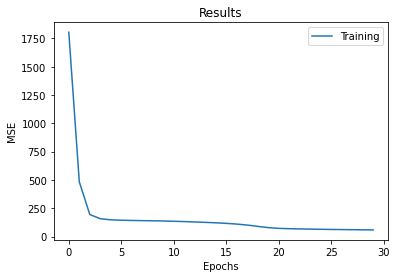

In [ ]:
# Training the neural network using the low resolution images as input and high resolution images as target

from tqdm import tqdm 

model = ConvNet(10)

criterion = nn.MSELoss() # The error used for the optimization is the Mean Square Error between the output of NN and the corresponding high resolution image

optimizer = optim.Adam(model.parameters(), lr=1e-3) # The error used to update the coefficients of the NN is the Adam optimizer

num_epochs = 30 # We use 30 training epochs 

tr_losses = np.zeros(num_epochs)

for epoch_nr in range(num_epochs):

    print("Epoch {}:".format(epoch_nr))
    
    running_loss = 0.0
    
    for i in tqdm(range(len(lr_train_batch))):
        
        output = model(lr_train_batch[i]) # The output batch of the NN 

        y = np.transpose(hr_train_batch[i],(0,3, 1, 2))
        y = y.reshape([8,3,384,384])
        y = torch.tensor(y,  dtype=torch.float)
        
        loss = criterion(output, y) # calculating the loss between output batch and target batch

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step() # updating the coefficients of the NN

        running_loss += loss.item()

    tr_loss = running_loss/len(lr_train)
    print('>> TRAIN: Epoch {} completed | tr_loss: {:.4f}'.format(
        epoch_nr, running_loss/len(lr_train)))  
    tr_losses[epoch_nr] = tr_loss 
        
plt.figure()
plt.plot(tr_losses, label='Training')
plt.title('Results')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

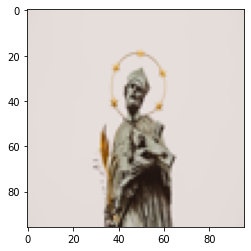

In [ ]:
# Showing a low resolution image before entering it into the NN
plt.imshow(np.array(lr_test[10]))

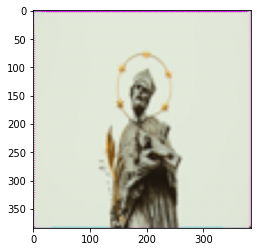

In [ ]:
# Showing the output of the NN using the LR image above as input 

pred = model(np.array(lr_test[10]).reshape(1,96,96,3))

pred = pred.detach().numpy()[0]

pred = np.transpose(pred, (1, 2, 0))

plt.imshow(pred.astype(np.uint8))

In [ ]:
# Defining a function that calculates the similarity between images 

def Peak_Signal_Noise_Ratio(img1,img2):
  l = np.array([0,0,0])
  size = pred.shape
  for k in range(size[2]) :
    s = 0
    for i in range(size[1]):
        for j in range(size[0]):
            s += ((img1[i][j][k])-(img2[i][j][k]))**2
    l[k] = s   
  l = l/(size[1]*size[0])
  m = np.mean(l)
  Max = np.max(img1)
  y = 10*np.log10((Max**2)/m)
  return(y)

In [ ]:
# PSNR between the predicted image above and it's corresponding high resolution image

Peak_Signal_Noise_Ratio(np.array(hr_test[10])/255,pred/255)

23.835699979783072

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


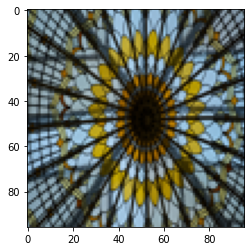

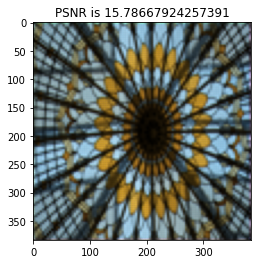

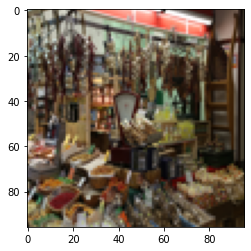

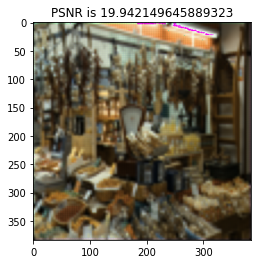

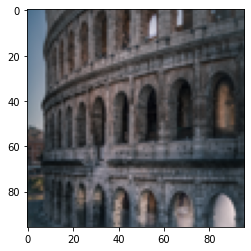

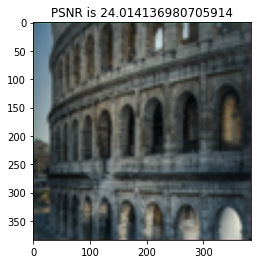

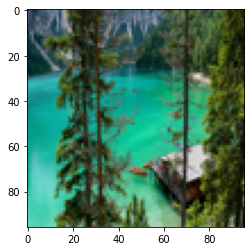

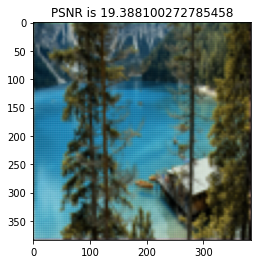

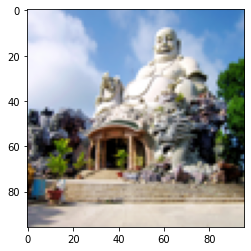

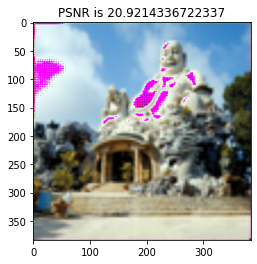

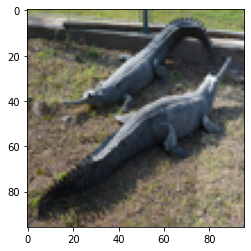

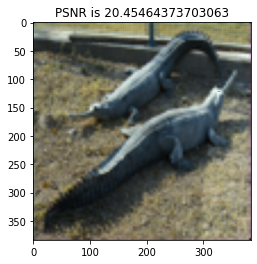

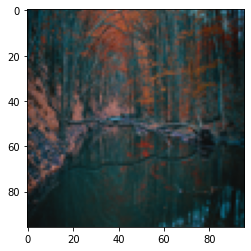

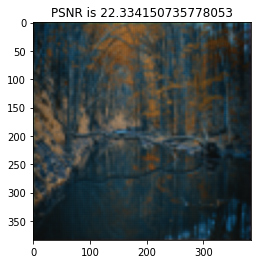

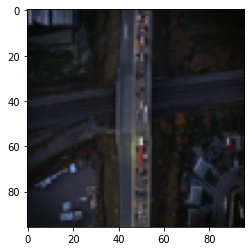

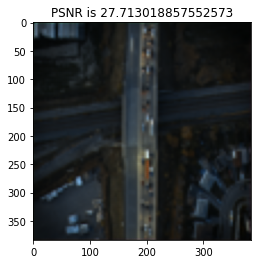

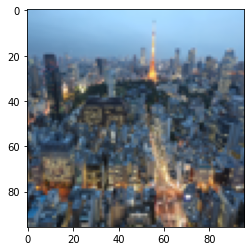

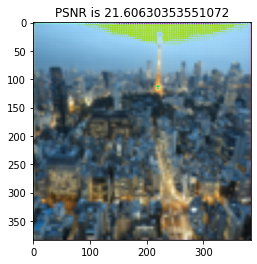

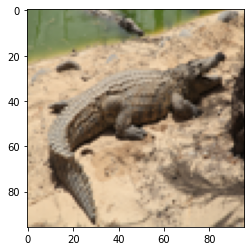

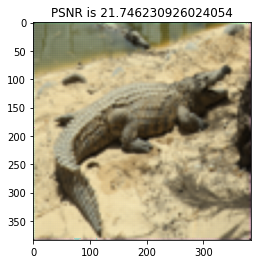

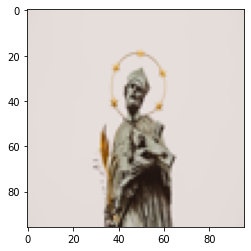

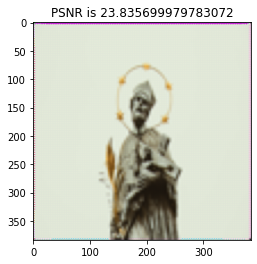

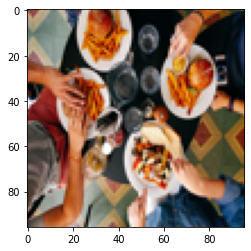

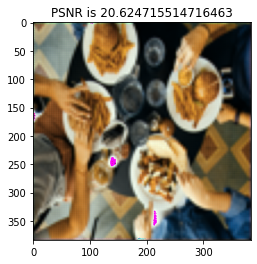

In [ ]:
# Showing low resolution images and the predicted high resolution images along with the corresponding PSNR 

for i,image in enumerate(lr_test):
  
  plt.figure()
  plt.imshow(np.array(image))
  predicted = model(np.array(image).reshape(1,96,96,3))
  predicted = predicted.detach().numpy()[0]
  predicted = np.transpose(predicted, (1, 2, 0))
  plt.figure()
  plt.imshow(predicted.astype(np.uint8))
  plt.title('PSNR is '+str(Peak_Signal_Noise_Ratio(np.array(hr_test[i])/255,predicted/255)))
  

In [ ]:
# PSNR of some images

for i,image in enumerate(lr_test):
  print('-------------------PSNR of image '+str(i)+' ----------------------------')
  
  predicted = model(np.array(image).reshape(1,96,96,3))
  predicted = predicted.detach().numpy()[0]
  predicted = np.transpose(predicted, (1, 2, 0))
  

  print(Peak_Signal_Noise_Ratio(np.array(hr_test[i])/255,predicted/255))


-------------------PSNR of image 0 ----------------------------
15.78667924257391
-------------------PSNR of image 1 ----------------------------
19.942149645889323
-------------------PSNR of image 2 ----------------------------
24.014136980705914
-------------------PSNR of image 3 ----------------------------
19.388100272785458
-------------------PSNR of image 4 ----------------------------
20.9214336722337
-------------------PSNR of image 5 ----------------------------
20.45464373703063
-------------------PSNR of image 6 ----------------------------
22.334150735778053
-------------------PSNR of image 7 ----------------------------
27.713018857552573
-------------------PSNR of image 8 ----------------------------
21.60630353551072
-------------------PSNR of image 9 ----------------------------
21.746230926024054
-------------------PSNR of image 10 ----------------------------
23.835699979783072
-------------------PSNR of image 11 ----------------------------
20.624715514716463
